In [0]:
from fastai.vision import *
from fastai import *

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_zip =  "/content/drive/My Drive/Deep Learning/10-monkey-species.zip"


In [0]:
path_zip = "/content/validation.zip"

In [20]:
from zipfile import ZipFile
with ZipFile(path_zip, "r") as zip:
  zip.extractall()
  print("done")
  


done


In [0]:
path = "/content/"

In [0]:
src = (ImageList.from_folder(path)
        .filter_by_folder()
        .split_by_folder(train = 'training', valid = 'validation')
       .label_from_folder()
       
       )

In [0]:
data = (src.transform(get_transforms(), size = 128)
        .databunch().normalize(imagenet_stats)
       )

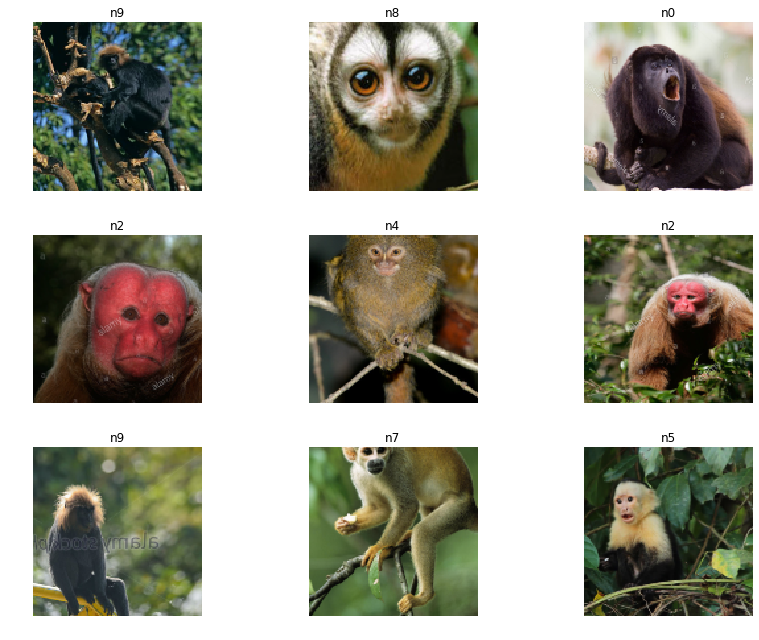

In [39]:
data.show_batch(rows = 3, figsize=(12,9))

In [0]:
architecture = models.resnet34

In [0]:
learner = cnn_learner(data, architecture, metrics = error_rate)

In [42]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


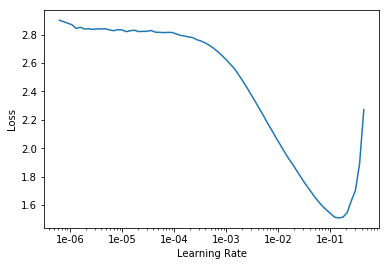

In [43]:
learner.recorder.plot()

In [0]:
learning_rate = 1e-2/2

In [51]:
learner.fit_one_cycle(5, slice(learning_rate))

epoch,train_loss,valid_loss,error_rate,time
0,1.821899,0.327866,0.080882,01:00
1,0.993016,0.189569,0.058824,01:01
2,0.659299,0.183253,0.058824,01:00
3,0.490240,0.176533,0.047794,00:59
4,0.384460,0.173688,0.047794,00:58


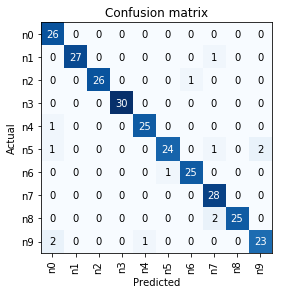

In [52]:
Interpreter = ClassificationInterpretation.from_learner(learner)
Interpreter.plot_confusion_matrix()